# Resnet & Catboost

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

df_train = pd.read_csv("train_data_emb.csv",index_col=0)
df_test = pd.read_csv("test_data_emb.csv",index_col=0)
print(df_train.shape)
print(df_test.shape)


(318438, 19)
(137057, 18)


## Preprocessing

In [5]:
def Convert_to_Num(df):
    dept_lst = df["Department"].unique()
    dept_lst.sort()
    dept_dict = dict(zip(dept_lst, range(len(dept_lst))))
    df.Department.replace(dept_dict, inplace=True)
    print(dept_dict)
    
    HRC_lst = df["Hospital_region_code"].unique()
    HRC_lst.sort()
    HRC_dict = dict(zip(HRC_lst, range(len(HRC_lst))))
    df.Hospital_region_code.replace(HRC_dict, inplace=True)
    print(HRC_dict)
    
    ward_lst = df["Ward_Type"].unique()
    ward_lst.sort()
    ward_dict = dict(zip(ward_lst, range(len(ward_lst))))
    df.Ward_Type.replace(ward_dict, inplace=True)
    print(ward_dict)
    
    WFC_lst = df["Ward_Facility_Code"].unique()
    WFC_lst.sort()
    WFC_dict = dict(zip(WFC_lst, range(len(WFC_lst))))
    df.Ward_Facility_Code.replace(WFC_dict, inplace=True)
    print(WFC_dict)
    
    TOA_lst = df["Type of Admission"].unique()
    TOA_lst.sort()
    TOA_dict = dict(zip(TOA_lst, range(len(TOA_lst))))
    df["Type of Admission"].replace(TOA_dict, inplace=True)
    print(TOA_dict)
    
    age_lst = df["Age"].unique()
    age_lst.sort()
    age_dict = dict(zip(age_lst, range(len(age_lst))))
    df["Age"].replace(age_dict, inplace=True)
    print(age_dict)
    
    HTC_lst = df["Hospital_type_code"].unique()
    HTC_lst.sort()
    HTC_dict = dict(zip(HTC_lst, range(len(HTC_lst))))
    df["Hospital_type_code"].replace(HTC_dict, inplace=True)
    print(HTC_dict)
    
Convert_to_Num(df_train)
stay_list = df_train["Stay"].unique()
stay_list.sort()
dept_Stay = dict(zip(stay_list, range(len(stay_list))))
df_train["Stay"].replace(dept_Stay, inplace=True)
df_train['Severity of Illness'] = df_train['Severity of Illness'].map({'Minor': 1,'Moderate': 2,'Extreme': 3})
print(dept_Stay)
    

{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
{'X': 0, 'Y': 1, 'Z': 2}
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


In [6]:
df_train["Bed Grade"] = df_train["Bed Grade"].fillna(2)
df_train.isnull().sum()


case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
StayCat                                 0
dtype: int64

In [7]:
df_train = pd.concat([df_train,pd.get_dummies(df_train['Hospital_region_code'], prefix='Hospital_region_code')],axis=1)
df_train = pd.concat([df_train,pd.get_dummies(df_train['Hospital_code'], prefix='Hospital_code')],axis=1)
df_train = pd.concat([df_train,pd.get_dummies(df_train['Hospital_type_code'], prefix='Hospital_type_code')],axis=1)
df_train = pd.concat([df_train,pd.get_dummies(df_train['City_Code_Hospital'], prefix='City_Code_Hospital')],axis=1)
df_train = pd.concat([df_train,pd.get_dummies(df_train['StayCat'], prefix='StayCat')],axis=1)


In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train[['Admission_Deposit']] = sc.fit_transform(df_train[['Admission_Deposit']])


## Split Data

In [10]:
y = df_train.Stay
x = df_train.drop(['Hospital_region_code','Hospital_code','Hospital_type_code','City_Code_Hospital',"Stay", "City_Code_Patient", "patientid","case_id","StayCat"],axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=8)

In [11]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286594 entries, 147932 to 70083
Data columns (total 71 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  286594 non-null  int64  
 1   Department                         286594 non-null  int64  
 2   Ward_Type                          286594 non-null  int64  
 3   Ward_Facility_Code                 286594 non-null  int64  
 4   Bed Grade                          286594 non-null  float64
 5   Type of Admission                  286594 non-null  int64  
 6   Severity of Illness                286594 non-null  int64  
 7   Visitors with Patient              286594 non-null  int64  
 8   Age                                286594 non-null  int64  
 9   Admission_Deposit                  286594 non-null  float64
 10  Hospital_region_code_0             286594 non-null  uint8  
 11  Hospital_region_code_1             

## Create dataloader

In [12]:
import torch

train = torch.tensor(x_train.values.astype(np.float32)) 
train_target = torch.tensor(y_train.values.astype(np.long))
train_tensor = torch.utils.data.TensorDataset(train, train_target) 
train_loader = torch.utils.data.DataLoader(dataset = train_tensor, batch_size = 3, shuffle = True)


test = torch.tensor(x_test.values.astype(np.float32)) 
test_target = torch.tensor(y_test.values.astype(np.long))
test_tensor = torch.utils.data.TensorDataset(test, test_target) 
test_loader = torch.utils.data.DataLoader(dataset = test_tensor, batch_size = 3, shuffle = True)
#DL_resnet2 46 best score 42/DL_resnetMax5 best 102
model_save_path = './saved_models/DL_resnetMax'
os.makedirs(model_save_path, exist_ok = True)

## Resnet Model

In [13]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Model(nn.Module):
    
    def __init__(self):
        '''Define model modules.'''
        super(Model, self).__init__()
        
        self.fc1 = nn.Linear(71, 60)
        self.fc12 = nn.Linear(60, 60)
        self.fc13 = nn.Linear(60, 60)
        self.n1 = nn.BatchNorm1d(60)
        self.drop1 = nn.Dropout(0.2)
        
        self.fc2 = nn.Linear(60, 50)
        self.fc22 = nn.Linear(50, 50)
        self.fc23 = nn.Linear(50, 50)
        self.n2 = nn.BatchNorm1d(50)
        
        self.fc3 = nn.Linear(50, 40)
        self.fc32 = nn.Linear(40, 40)
        self.fc33 = nn.Linear(40, 40) 
        self.n3 = nn.BatchNorm1d(40)
        
        self.fc4 = nn.Linear(40, 30)
        self.fc42 = nn.Linear(30, 30)
        self.fc43 = nn.Linear(30, 30) 
        self.n4 = nn.BatchNorm1d(30)
        
        self.fc5 = nn.Linear(30, 20)
        self.fc52 = nn.Linear(20, 20)
        self.fc53 = nn.Linear(20, 20) 
        self.n5 = nn.BatchNorm1d(20)
        
        
        self.fc6 = nn.Linear(20, 11)
    def forward(self, x):
        '''Define the model architecture (the sequence to place the model modules).'''
        x1 = F.relu( self.n1(self.fc1(x)) )
        x  = F.relu( self.n1(self.fc12(x1)) )
        x  = F.relu(x+x1)
        x  = self.drop1(x)
        
      
        x2 = F.relu( self.n2(self.fc2(x)) )
        x  = F.relu( self.n2(self.fc22(x2)) )
        x  = F.relu(x+x2)
        x  = self.drop1(x)
        
        x3 = F.relu( self.n3(self.fc3(x)) )
        x  = F.relu( self.n3(self.fc32(x3)) )
        x  = F.relu(x+x3)
        x  = self.drop1(x)
        
        x4 = F.relu( self.n4(self.fc4(x)) )
        x  = F.relu( self.n4(self.fc42(x4)) )
        x  = F.relu(x+x4)
        x  = self.drop1(x)
        
        x5 = F.relu( self.n5(self.fc5(x)) )
        x  = F.relu( self.n5(self.fc52(x5)) )
        x  = F.relu(x+x5)
        x  = self.drop1(x)

        x = self.fc6(x)
        return F.log_softmax(x, dim = 1)
net = Model()
print(net)

Model(
  (fc1): Linear(in_features=71, out_features=60, bias=True)
  (fc12): Linear(in_features=60, out_features=60, bias=True)
  (fc13): Linear(in_features=60, out_features=60, bias=True)
  (n1): BatchNorm1d(60, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=60, out_features=50, bias=True)
  (fc22): Linear(in_features=50, out_features=50, bias=True)
  (fc23): Linear(in_features=50, out_features=50, bias=True)
  (n2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=50, out_features=40, bias=True)
  (fc32): Linear(in_features=40, out_features=40, bias=True)
  (fc33): Linear(in_features=40, out_features=40, bias=True)
  (n3): BatchNorm1d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=40, out_features=30, bias=True)
  (fc42): Linear(in_features=30, out_features=30, bias=True)
  (fc43): Linear(in_f

## Training

In [14]:
from time import time
mini_batch = False
net = Model()
history = {'train_loss': list(), 'validation_loss': list()}
last_score = 10
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor = 0.85, patience = 2, verbose = True)
EPOCHS = 1000

train_epoch_loss = []
validation_epoch_loss = []
print('Starting Training Process')
for epoch in range(EPOCHS):
    train_loss = []
    validation_loss = []

    train_epoch_loss, train_batch_loss, batch_iteration = 0, 0, 0
    validation_score, validation_loss = 0, 0
    net.train()
    start_time = time()
    for batch, (train_features, train_target) in enumerate(train_loader):
        batch_iteration += 1
        

        train_target_predicted = net(train_features)

        # compute the loss
        loss_value = F.cross_entropy(train_target_predicted, train_target)
        train_loss.append(loss_value.cpu().data.item())

        # reset the gradient
        optimizer.zero_grad()
        # backpropagate the loss
        loss_value.backward()
        # update the parameters
        optimizer.step()

        #######################################################
        ###################### Validation #####################
        #######################################################
        # Set the model to evaluation mode so that parameters are fixed.
        net.eval()

        train_epoch_loss += loss_value.item()
        train_batch_loss += loss_value.item()

        # Printing batch logs if any. Useful if you want to see the training trends within each epoch.
        if mini_batch:
            if (batch + 1) % mini_batch == 0:
                train_batch_loss = train_batch_loss / (mini_batch * train_loader.batch_size)
                print(
                    f'    Batch: {batch + 1:2d},\tBatch Loss: {train_batch_loss:.7f}')
                train_batch_loss = 0

    train_epoch_loss = train_epoch_loss / (batch_iteration * train_loader.batch_size)
    
    ################################### Validation ##################################################
    net.eval()
    # To get data in loops.
    batch_iteration = 0

    for batch, (test_features, test_target) in enumerate(test_loader):
        # Keeping track how many iteration is happening.
        batch_iteration += 1
        # Predicted output from the input sample.
        target_prediction = net(test_features)
        
        # comput validation loss
        loss_value = criterion(target_prediction, test_target)
        validation_loss += loss_value.item()
        
        # Threshold elimination.

        #target_prediction = target_prediction.cpu().numpy()

    # Calculating the mean score for the whole validation dataset.
    validation_loss = validation_loss / (batch_iteration * train_loader.batch_size)
    
    # Collecting all epoch loss values for future visualization.
    history['train_loss'].append(train_epoch_loss)
    history['validation_loss'].append(validation_loss)
    
    # Reduce LR On Plateau
    scheduler.step(validation_loss)

    time_taken = time() - start_time
    
    # Training Logs printed.
    print(f'Epoch: {epoch + 1:3d},  ', end = '')
    print(f'train Loss: {train_epoch_loss:.5f},  ', end = '')
    print(f'validation Loss: {validation_loss:.5f},  ', end = '')


    for pg in optimizer.param_groups:
        print('current lr: ', pg['lr'], ', ', end = '')
    print(f'Time: {time_taken:.2f} s', end = '')

    # Save the model every epoch.
    current_epoch_model_save_path = os.path.join(model_save_path, 'Basic_DL_epoch_%s.pth' % (str(epoch).zfill(3)))
    torch.save(net.state_dict(), current_epoch_model_save_path)
    
    # Save the best model (determined by validation score) and give it a unique name.
    best_model_path = os.path.join(model_save_path, 'Basic_DL_best_model.pth')
    if  last_score > validation_loss:
        torch.save(net.state_dict(), best_model_path)
        last_score = validation_loss
        print(f'\tBest model saved at loss: {validation_loss:.5f}')
    else:
        print()

print(f'Training Finished after {EPOCHS} epoches')



Starting Training Process
Epoch:   1,  train Loss: 0.55149,  validation Loss: 0.53401,  current lr:  0.001 , Time: 352.99 s	Best model saved at loss: 0.53401
Epoch:   2,  train Loss: 0.53105,  validation Loss: 0.52681,  current lr:  0.001 , Time: 375.19 s
Epoch:   3,  train Loss: 0.52498,  validation Loss: 0.52354,  current lr:  0.001 , Time: 356.81 s
Epoch:   4,  train Loss: 0.52192,  validation Loss: 0.51978,  current lr:  0.001 , Time: 344.51 s
Epoch:   5,  train Loss: 0.51911,  validation Loss: 0.51803,  current lr:  0.001 , Time: 360.48 s
Epoch:   6,  train Loss: 0.51723,  validation Loss: 0.51664,  current lr:  0.001 , Time: 358.87 s
Epoch:   7,  train Loss: 0.51575,  validation Loss: 0.51660,  current lr:  0.001 , Time: 351.56 s
Epoch:   8,  train Loss: 0.51419,  validation Loss: 0.51526,  current lr:  0.001 , Time: 342.96 s
Epoch:   9,  train Loss: 0.51333,  validation Loss: 0.51262,  current lr:  0.001 , Time: 342.71 s
Epoch:  10,  train Loss: 0.51245,  validation Loss: 0.5125

KeyboardInterrupt: 

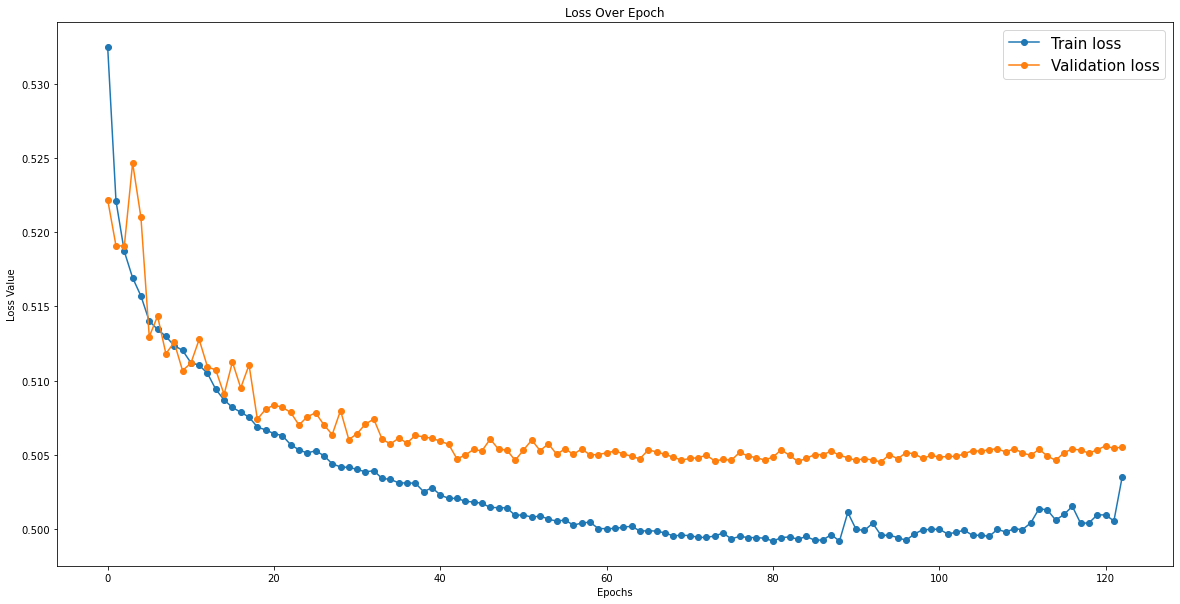

In [276]:
plt.figure(figsize=(20, 10))
plt.title('Loss Over Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
train_curve = plt.plot(history['train_loss'], marker = 'o', label = 'Train loss')
validation_curve = plt.plot(history['validation_loss'], marker = 'o', label = 'Validation loss')
plt.legend(fontsize = 15)
plt.show()

In [15]:
history['validation_loss'].index(min(history['validation_loss']))

68

In [17]:
# Load the net model at its prime (when it performed the best on the validation set).
state_dict = torch.load(os.path.join(model_save_path, 'Basic_DL_epoch_068.pth'))
net.load_state_dict(state_dict)

# Testing process on test data.
net.eval()


# Score after testing on dataset.
mean_test_score = 0
result=[]#np.empty([1, 1])
targetResult=[]#np.empty([1, 1])

for batch, (test_features, test_target) in enumerate(test_loader):
    # Data prepared to be given as input to model.
    # Predicted output from the input sample.
    target_prediction = net(test_features)
    p,predicted = torch.max(target_prediction.data, 1)
    predicted=predicted.numpy()
    #print(predicted)
    result=np.append(result,predicted)
    targetResult=np.append(targetResult,test_target.numpy())
accuracy_score(targetResult, result)

0.4160281371686974

## Predict on test dataset

In [20]:
df_test = pd.read_csv("test_data_emb.csv",index_col=0)
Convert_to_Num(df_test)
df_test["Bed Grade"] = df_test["Bed Grade"].fillna(2)
df_test = pd.concat([df_test,pd.get_dummies(df_test['Hospital_region_code'], prefix='Hospital_region_code')],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['Hospital_code'], prefix='Hospital_code')],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['Hospital_type_code'], prefix='Hospital_type_code')],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['City_Code_Hospital'], prefix='City_Code_Hospital')],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['StayCat'], prefix='StayCat')],axis=1)
df_test[['Admission_Deposit']] = sc.fit_transform(df_test[['Admission_Deposit']])
df_test.drop(['Hospital_region_code','Hospital_code','Hospital_type_code','City_Code_Hospital', "City_Code_Patient", "patientid", "case_id", "StayCat"],axis=1, inplace=True)
df_test['Severity of Illness'] = df_test['Severity of Illness'].map({'Minor': 1,'Moderate': 2,'Extreme': 3})
testPred = torch.tensor(df_test.values.astype(np.float32))

{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
{'X': 0, 'Y': 1, 'Z': 2}
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}


In [21]:
result=[]
for i in range(len(testPred)):
    target_prediction = net(testPred[i,:].view( 1,71))
    p,predicted = torch.max(target_prediction.data, 1)
    predicted=predicted.numpy()
    #print(predicted)
    result=np.append(result,predicted)

## Save results

In [22]:
df_ID = pd.read_csv("test_data.csv")
dR = {'case_id': df_ID["case_id"]}
d_result = pd.DataFrame(data=dR)
d_result["Stay"]=result
d_result['Stay'] = d_result['Stay'].map({0.: '0-10',1.: '11-20', 2.: '21-30',3.: '31-40', 
                                         4.: '41-50',5.: '51-60', 6.: '61-70',7.: '71-80',
                                         8.: '81-90', 9.: '91-100',10.: 'More than 100 Days'})
d_result.to_csv(r'output.csv', index = False)
d_result.head()

,case_id,Stay
0,318439,0-10
1,318440,51-60
2,318441,21-30
3,318442,21-30
4,318443,51-60


# Catboost
## The softmax outputs of all MLPs were recombined subsequently with the catboost to obtain the final ensemble prediction.


In [26]:
df_trainC = pd.read_csv("train_data.csv",index_col=0)
df_testC = pd.read_csv("test_data.csv",index_col=0)
df_train.drop(['Hospital_region_code','Hospital_code','Hospital_type_code','City_Code_Hospital',"Stay", "City_Code_Patient", "patientid","case_id","StayCat"],axis=1, inplace=True)

## Combine softmax outputs

In [27]:
trainPred = torch.tensor(df_train.values.astype(np.float32))
result=[]
resnet0=[]
resnet1=[]
resnet2=[]
resnet3=[]
resnet4=[]
resnet5=[]
resnet6=[]
resnet7=[]
resnet8=[]
resnet9=[]
resnet10=[]
resnet=[]
#for batch, (test_features,T) in enumerate(testPred_loader):
for i in range(len(trainPred)):
    target_prediction = net(trainPred[i,:].view( 1,71))
    #p,predicted = torch.max(target_prediction.data, 1)
    predicted=target_prediction.detach().numpy()
    #print(predicted)
    #print(np.mean(predicted))

    resnet0.append(predicted[0][0])
    resnet1.append(predicted[0][1])
    resnet2.append(predicted[0][2])
    resnet3.append(predicted[0][3])
    resnet4.append(predicted[0][4])
    resnet5.append(predicted[0][5])
    resnet6.append(predicted[0][6])
    resnet7.append(predicted[0][7])
    resnet8.append(predicted[0][8])
    resnet9.append(predicted[0][9])
    resnet10.append(predicted[0][10])

df_trainC["resnet0"]=resnet0
df_trainC["resnet1"]=resnet1
df_trainC["resnet2"]=resnet2
df_trainC["resnet3"]=resnet3
df_trainC["resnet4"]=resnet4
df_trainC["resnet5"]=resnet5
df_trainC["resnet6"]=resnet6
df_trainC["resnet7"]=resnet7
df_trainC["resnet8"]=resnet8
df_trainC["resnet9"]=resnet9
df_trainC["resnet10"]=resnet10


In [28]:
result=[]
resnet0=[]
resnet1=[]
resnet2=[]
resnet3=[]
resnet4=[]
resnet5=[]
resnet6=[]
resnet7=[]
resnet8=[]
resnet9=[]
resnet10=[]
resnet=[]
#for batch, (test_features,T) in enumerate(testPred_loader):
for i in range(len(testPred)):
    target_prediction = net(testPred[i,:].view( 1,71))
    #p,predicted = torch.max(target_prediction.data, 1)
    predicted=target_prediction.detach().numpy()

    resnet0.append(predicted[0][0])
    resnet1.append(predicted[0][1])
    resnet2.append(predicted[0][2])
    resnet3.append(predicted[0][3])
    resnet4.append(predicted[0][4])
    resnet5.append(predicted[0][5])
    resnet6.append(predicted[0][6])
    resnet7.append(predicted[0][7])
    resnet8.append(predicted[0][8])
    resnet9.append(predicted[0][9])
    resnet10.append(predicted[0][10])

df_testC["resnet0"]=resnet0
df_testC["resnet1"]=resnet1
df_testC["resnet2"]=resnet2
df_testC["resnet3"]=resnet3
df_testC["resnet4"]=resnet4
df_testC["resnet5"]=resnet5
df_testC["resnet6"]=resnet6
df_testC["resnet7"]=resnet7
df_testC["resnet8"]=resnet8
df_testC["resnet9"]=resnet9
df_testC["resnet10"]=resnet10


## Preprocessing

In [30]:
Convert_to_Num(df_trainC)
stay_list = df_trainC["Stay"].unique()
stay_list.sort()
dept_Stay = dict(zip(stay_list, range(len(stay_list))))
df_trainC["Stay"].replace(dept_Stay, inplace=True)
df_trainC['Severity of Illness'] = df_trainC['Severity of Illness'].map({'Minor': 1,'Moderate': 2,'Extreme': 3})
print(dept_Stay)


{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
{'X': 0, 'Y': 1, 'Z': 2}
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9, 'More than 100 Days': 10}


In [31]:
df_trainC["Bed Grade"] = df_trainC["Bed Grade"].fillna(2)
df_trainC.isnull().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
resnet0                                 0
resnet1                                 0
resnet2                                 0
resnet3                                 0
resnet4                                 0
resnet5                                 0
resnet6                           

In [32]:
y = df_trainC.Stay
x = df_trainC.drop(columns=["Stay", "City_Code_Patient", "patientid"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)

## Train again

0:	learn: 0.4169500	test: 0.4115375	best: 0.4115375 (0)	total: 1.51s	remaining: 30m 11s
50:	learn: 0.4271796	test: 0.4192156	best: 0.4194825 (42)	total: 1m 9s	remaining: 26m 4s
100:	learn: 0.4305123	test: 0.4199535	best: 0.4202204 (67)	total: 2m 13s	remaining: 24m 12s
150:	learn: 0.4337507	test: 0.4202519	best: 0.4205031 (147)	total: 3m 17s	remaining: 22m 48s
200:	learn: 0.4370049	test: 0.4202204	best: 0.4206915 (181)	total: 4m 19s	remaining: 21m 31s
250:	learn: 0.4402630	test: 0.4206601	best: 0.4208328 (235)	total: 5m 21s	remaining: 20m 16s
300:	learn: 0.4432699	test: 0.4213039	best: 0.4213353 (297)	total: 6m 23s	remaining: 19m 5s
350:	learn: 0.4463278	test: 0.4215551	best: 0.4216650 (348)	total: 7m 24s	remaining: 17m 56s
400:	learn: 0.4494603	test: 0.4214609	best: 0.4217749 (356)	total: 8m 27s	remaining: 16m 50s
450:	learn: 0.4524318	test: 0.4209270	best: 0.4217749 (356)	total: 9m 36s	remaining: 15m 57s
500:	learn: 0.4547792	test: 0.4208956	best: 0.4217749 (356)	total: 10m 42s	remain

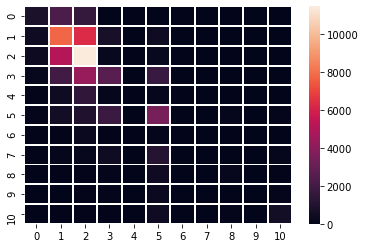

catboost Acc :  0.7563977685291774


In [33]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_dataset = Pool(x_test,
                    y_test)

model = CatBoostClassifier(iterations=1200,
                           learning_rate=0.03,
                           depth=10,
                           l2_leaf_reg = 3,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')

model.fit(x_train,
          y_train,
          eval_set=eval_dataset,
          verbose=50)

print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=1)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)



In [34]:
import catboost
pred = model.predict(
                 eval_dataset, 
                 verbose=True)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.4217749026504208

## Predict on test dataset

In [36]:
Convert_to_Num(df_testC)
df_testC['Severity of Illness'] = df_testC['Severity of Illness'].map({'Minor': 1,'Moderate': 2,'Extreme': 3})
df_testC["Bed Grade"] = df_testC["Bed Grade"].fillna(2)
df_testC = df_testC.drop(columns=["City_Code_Patient", "patientid"])
eval_dt = Pool(df_testC)
preds_class = model.predict(eval_dt)
preds_class.shape

{'TB & Chest disease': 0, 'anesthesia': 1, 'gynecology': 2, 'radiotherapy': 3, 'surgery': 4}
{'X': 0, 'Y': 1, 'Z': 2}
{'P': 0, 'Q': 1, 'R': 2, 'S': 3, 'T': 4, 'U': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5}
{'Emergency': 0, 'Trauma': 1, 'Urgent': 2}
{'0-10': 0, '11-20': 1, '21-30': 2, '31-40': 3, '41-50': 4, '51-60': 5, '61-70': 6, '71-80': 7, '81-90': 8, '91-100': 9}
{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}


(137057, 1)

In [37]:
df_sub = pd.DataFrame(index=df_testC.index)
df_sub["Stay"] = preds_class
swap_dict_Stay = dict([(value, key) for key, value in dept_Stay.items()])
df_sub["Stay"].replace(swap_dict_Stay, inplace=True)
df_sub.head()

,Stay
case_id,
318439,0-10
318440,51-60
318441,21-30
318442,21-30
318443,51-60


## Save

In [38]:
df_sub.to_csv("Submission.csv")